# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

This notebook was generated by an AI assistant and has not been fully verified. Users should exercise caution when interpreting the code or results and should independently verify critical findings.

This notebook provides an initial exploration of Dandiset 001375, titled "Septum GABA disruption with DREADDs". The Dandiset is a pilot study investigating the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity.

You can access the Dandiset on the DANDI archive: https://dandiarchive.org/dandiset/001375/0.250406.1855

This notebook will demonstrate how to:
- Load the Dandiset using the DANDI API.
- Access information about the assets within the Dandiset.
- Load a specific NWB file from the Dandiset.
- Explore the structure and contents of the NWB file, including trial information, electrophysiology time series data, units, and electrode information.
- Visualize some of the data from the NWB file.

### Required Packages

This notebook requires the following Python packages to be installed:
- dandi
- pynwb
- h5py
- remfile
- numpy
- matplotlib
- pandas
- seaborn (for thematic styling)

### Loading the Dandiset

We will start by connecting to the DANDI archive and accessing the Dandiset using the `dandi` Python package.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Apply seaborn style for plots (excluding images if any)
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375", "0.250406.1855")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

First 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)


### Loading a Specific NWB File

This Dandiset contains NWB files with electrophysiology data. We will now load one of these files to explore its contents in more detail.

We are choosing to explore the file located at `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb` with asset ID `ce525828-8534-4b56-9e47-d2a34d1aa897`. The URL for this asset is constructed using the asset ID.

In [2]:
# Load the NWB file
nwb_url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("NWB file loaded successfully.")

# Display some top-level metadata from the NWB file
print(f"\nSession description: {nwb.session_description}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Session start time: {nwb.session_start_time}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully.

Session description: mouse running laps in virtual hallway
Subject ID: MS13B
Session start time: 2024-07-25 19:00:00-07:00


### NWB File Structure Overview

The NWB file contains various types of neurophysiology data and associated metadata. Below is a summary of some of the key sections and their contents, based on the structure reported by the `nwb-file-info` tool:

*   **`acquisition`**: Contains acquired data streams.
   *   `time_series`: Electrophysiology time series data.
       *   Shape: (144675584, 256)
       *   Data Type: int16
       *   Rate: 30000.0 Hz
       *   Unit: mV
*   **`electrode_groups`**: Information about groups of electrodes (shanks).
   *   `shank1`: Description "shank1, electrodes", Location "ventral hippocampus, visual cortex", Device "128 ch silicon probe"
   *   `shank2`: Description "shank2, electrodes", Location "ventral hippocampus, visual cortex", Device "128 ch silicon probe"
*   **`devices`**: Information about the recording devices.
   *   `silicon probe array`: Description "128 ch silicon probe", Manufacturer "UCLA"
*   **`intervals`**: Contains time intervals for experimental events.
   *   `trials`: Defines trial start and stop times.
       *   Columns: 'start_time', 'stop_time'
       *   Number of trials: 387
*   **`electrodes`**: Detailed information about each electrode.
   *   Columns: 'x', 'y', 'location', 'filtering', 'group', 'group_name', 'label'
   *   Number of electrodes: 256
*   **`subject`**: Information about the experimental subject.
   *   Age: P90D
   *   Description: medial septum DREADD to suppress GABA interneurons
   *   Sex: M
   *   Species: Mus musculus
   *   Subject ID: MS13B
*   **`units`**: Contains information about sorted units (neurons).
   *   Columns: 'spike_times'
   *   Number of units: 33

This structure indicates that the file contains raw electrophysiology recordings from 256 channels across two shanks, trial timing information, and sorted spike times for 33 potentially distinct units.

You can explore this NWB file in more detail using Neurosift:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=0.250406.1855

### Exploring Trial Data

The `trials` intervals table provides the start and stop times for each trial in the session. We can load this data into a pandas DataFrame for easier analysis.

Number of trials: 387

First 5 trials:
    start_time  stop_time
id                       
0     4.323800  16.929833
1    16.963067  28.414333
2    28.447100  39.402833
3    39.435833  50.027033
4    50.059667  63.064467


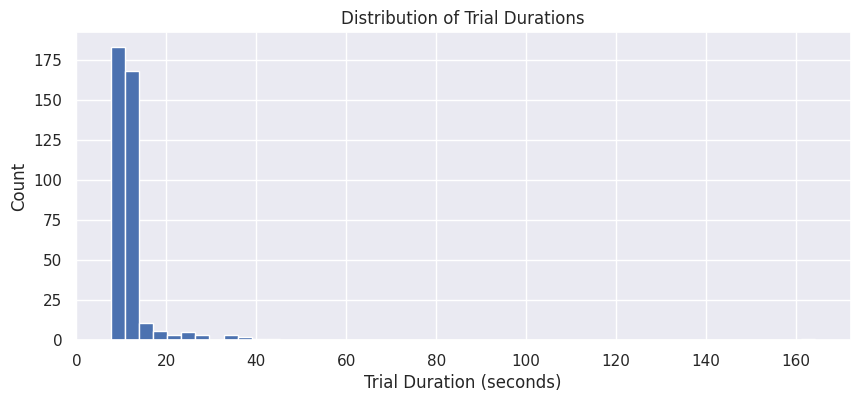

In [3]:
# Load the trials data into a pandas DataFrame
trials_df = nwb.trials.to_dataframe()

print(f"Number of trials: {len(trials_df)}")
print("\nFirst 5 trials:")
print(trials_df.head())

# Plot trial durations as a histogram
trials_df['duration'] = trials_df['stop_time'] - trials_df['start_time']

plt.figure(figsize=(10, 4))
plt.hist(trials_df['duration'], bins=50)
plt.xlabel('Trial Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Trial Durations')
plt.show()

### Exploring Raw Electrophysiology Data

The `acquisition` section contains the raw electrophysiology time series data. This dataset is very large, so we will only load and visualize a small subset of the data to demonstrate how to access it.

Time series data shape: (144675584, 256)
Sampling rate: 30000.0 Hz
Unit: mV


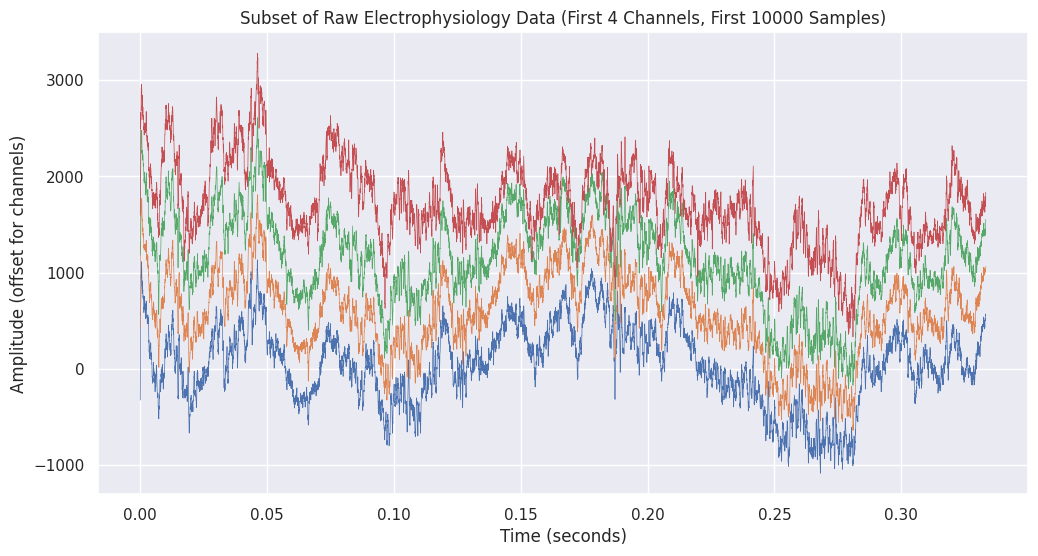

In [4]:
# Access the time series data
time_series = nwb.acquisition["time_series"] # Access by name 'time_series' in acquisition

print(f"Time series data shape: {time_series.data.shape}")
print(f"Sampling rate: {time_series.rate} Hz")
print(f"Unit: {time_series.unit}")

# Load a small subset of data (e.g., first 10000 samples for first 4 channels)
num_samples_to_load = 10000
num_channels_to_load = 4

# Ensure we don't request more samples or channels than available
num_samples_to_load = min(num_samples_to_load, time_series.data.shape[0])
num_channels_to_load = min(num_channels_to_load, time_series.data.shape[1])

# Access data using slicing
# Note: Direct indexing with a list/array of indices is not supported for h5py.Dataset
subset_data = time_series.data[:num_samples_to_load, :num_channels_to_load]

# Load the corresponding timestamps
# We only load times for the subset of data we are interested in
subset_timestamps = time_series.timestamps[:num_samples_to_load] if time_series.timestamps is not None else np.arange(num_samples_to_load) / time_series.rate + time_series.starting_time

# Plot the subset of data
plt.figure(figsize=(12, 6))
for i in range(num_channels_to_load):
    # Offset signals for better visualization
    offset = i * 500 # Adjust offset based on data scale
    plt.plot(subset_timestamps, subset_data[:, i] + offset, linewidth=0.5)

plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (offset for channels)')
plt.title(f'Subset of Raw Electrophysiology Data (First {num_channels_to_load} Channels, First {num_samples_to_load} Samples)')
plt.show()

### Exploring Units Data

The `units` table contains information about sorted neural units, including their spike times.

In [5]:
# Access the units table
units_table = nwb.units

print(f"Number of units: {len(units_table.id)}")
print("\nUnits table columns:")
print(units_table.colnames)

# Show the first few unit IDs
print("\nFirst 5 Unit IDs:")
print(units_table.id[:5])

# You can access spike times for a specific unit by its index,
# but iterating through spike times for visualization here is omitted
# as spike sorting analysis is computationally intensive and beyond the scope
# of a basic notebook walkthrough.

# Example of accessing spike times for the first unit (by index)
# if len(units_table.spike_times) > 0:
#     first_unit_spike_times = units_table.spike_times[0]
#     print(f"\nNumber of spike times for first unit: {len(first_unit_spike_times)}")
# else:
#     print("\nNo spike times available in the units table.")

Number of units: 33

Units table columns:
('spike_times',)

First 5 Unit IDs:
[1 2 3 4 5]


### Exploring Electrode Data

The `electrodes` table provides details about each recording electrode. We can convert this to a pandas DataFrame to inspect the electrode metadata, such as location and group.

In [6]:
# Load the electrodes data into a pandas DataFrame
electrodes_df = nwb.electrodes.to_dataframe()

print(f"Number of electrodes: {len(electrodes_df)}")
print("\nFirst 5 electrodes:")
print(electrodes_df.head())

# Display unique electrode locations
print(f"\nUnique electrode locations: {electrodes_df['location'].unique()}")

Number of electrodes: 256

First 5 electrodes:
       x       y location        filtering  \
id                                           
0   20.0  1375.0  unknown  0.1 - 7500.0 Hz   
1   20.0  1325.0  unknown  0.1 - 7500.0 Hz   
2   20.0  1275.0  unknown  0.1 - 7500.0 Hz   
3   20.0  1225.0  unknown  0.1 - 7500.0 Hz   
4   20.0  1175.0  unknown  0.1 - 7500.0 Hz   

                                                group group_name  \
id                                                                 
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x13873...     shank1   
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x13873...     shank1   
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x13873...     shank1   
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x13873...     shank1   
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x13873...     shank1   

                  label  
id                       
0   shank1-electrode001  
1   shank1-electrode002  
2   shank1-electrode003  
3   shank1-electrode004

### Summary and Future Directions

This notebook has provided a basic introduction to accessing and exploring data from Dandiset 001375. We have demonstrated how to:

*   Connect to the DANDI archive and list Dandiset assets.
*   Load a specific NWB file using its URL.
*   Inspect the structure and key contents of the NWB file.
*   Load and visualize trial timing information.
*   Load and visualize a small subset of the raw electrophysiology time series data.
*   Briefly explore the units and electrodes tables.

Potential future directions for analysis with this Dandiset could include:

*   Analyzing the full electrophysiology time series data (requires significant computational resources and specialized tools).
*   Performing more in-depth analysis of sorted units and their firing properties.
*   Investigating the relationship between neural activity, trial events, and subject behavior.
*   Comparing data across different subjects or experimental conditions within the Dandiset.

Remember that advanced analysis of large neurophysiology datasets often requires downloading the data locally and using specialized software packages. This notebook serves as a starting point for understanding the data structure and accessing the data remotely.